In [231]:
# Importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, pairwise_distances
import matplotlib.pyplot as plt

# 1. Préparation des données

In [232]:
# Chargement du fichier de données
dataset = pd.read_csv("./Fichiers de données/cs448b_ipasn.csv")
dataset

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1
...,...,...,...,...
20798,2006-09-30,8,36351,3
20799,2006-09-30,8,36856,4
20800,2006-09-30,9,2152,1
20801,2006-09-30,9,8070,1


In [233]:
# Prise de connaissance des flux de connections des ip du fichier de données
print('Nombre de jours pour lesquels les données sont disponibles: {:d}'.format(dataset['date'].nunique()))
print('Nombre de flux minimal par jour: {:d}'.format(dataset['f'].min()))
print('Nombre de flux maximal par jour: {:d}'.format(dataset['f'].max()))

Nombre de jours pour lesquels les données sont disponibles: 92
Nombre de flux minimal par jour: 1
Nombre de flux maximal par jour: 784234


In [234]:
# Nature des données du fichier de données
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    20803 non-null  object
 1   l_ipn   20803 non-null  int64 
 2   r_asn   20803 non-null  int64 
 3   f       20803 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 650.2+ KB


In [235]:
# Nettoyage des données
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)

In [236]:
# Sélection des caractéristiques pertinentes
X = dataset[['l_ipn', 'r_asn', 'f']]

In [237]:
# Normalisation des données
X_normalized = StandardScaler().fit_transform(X)

# 2. Application du DBSCAN

### a. Choix des valeurs de ε et MinPts

In [238]:
ε = .6
MinPts = 10

### b. Application du DBSCAN sur les données normalisées

In [239]:
dbscan = DBSCAN(eps = ε, min_samples = MinPts)
clusters = dbscan.fit_predict(X_normalized)

### c. Étiquettages des adresses IP

In [240]:
dataset['etiquette'] = np.where(clusters == -1, 'Suspecte', 'Normale')
dataset

,date,l_ipn,r_asn,f,etiquette
0,2006-07-01,0,701,1,Normale
1,2006-07-01,0,714,1,Normale
2,2006-07-01,0,1239,1,Normale
3,2006-07-01,0,1680,1,Normale
4,2006-07-01,0,2514,1,Normale
...,...,...,...,...,...
20798,2006-09-30,8,36351,3,Normale
20799,2006-09-30,8,36856,4,Normale
20800,2006-09-30,9,2152,1,Normale
20801,2006-09-30,9,8070,1,Normale


# 3. Analyse des résultats

### a. Visualisation des clusters

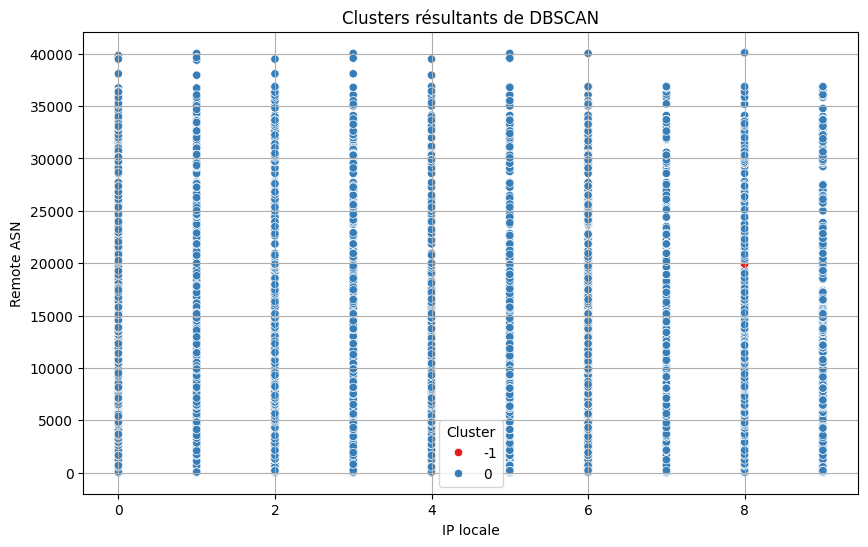

In [241]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['l_ipn'], y=X['r_asn'], hue=clusters, palette='Set1')
plt.title('Clusters résultants de DBSCAN')
plt.xlabel('IP locale')
plt.ylabel('Remote ASN')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### b. Examiner les adresses IP étiquetées comme suspectes

In [242]:
suspect_ips = dataset[dataset['etiquette'] == 'Suspecte']
print("Adresses IP suspectes:")
print(suspect_ips)

Adresses IP suspectes:
             date  l_ipn  r_asn       f etiquette
18237  2006-09-17      4   3671  274011  Suspecte
18392  2006-09-18      4   3671  784234  Suspecte
18833  2006-09-20      8  19916    7899  Suspecte
20584  2006-09-29      8  19916    7902  Suspecte


# 4. Évaluation des performances de DBSCAN

In [243]:
# Calculer le coefficient de Silhouette
silhouette_score = silhouette_score(X_normalized, clusters)
print("Coefficient de Silhouette:", silhouette_score)

# Calculer le coefficient de Davies-Bouldin
db_score = davies_bouldin_score(X_normalized, clusters)
print("Coefficient de Davies-Bouldin :", db_score)

# Calculer le coefficient de Calinski-Harabasz
ch_score = calinski_harabasz_score(X_normalized, clusters)
print("Coefficient de Calinski-Harabasz :", ch_score)

Coefficient de Silhouette: 0.961989334341596
Coefficient de Davies-Bouldin : 1.0016083001899112
Coefficient de Calinski-Harabasz : 3357.9839057820527


Les scores obtenus étant plus élevés nous deduisons que les clusters sont denses et bien séparés.